In [1]:
#get data from HiGlass
#https://data.4dnucleome.org/higlass-view-configs/11a779d9-7f1a-493b-8b8f-f8d7828c1d45/
#https://data.4dnucleome.org/higlass-view-configs/bd7af8df-8b99-404b-8a8b-b0ca13c021db/
#files: https://data.4dnucleome.org/files-processed/4DNFI3EWJW3N/
# https://data.4dnucleome.org/files-processed/4DNFIGGQLLHW/

Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [3]:
!pip install cooler hicrep


In [71]:
import matplotlib.pyplot as plt

In [5]:
import cooler

In [6]:
import numpy as np

In [7]:
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

In [8]:
mcool1='4DNFI3EWJW3N.mcool'
mcool2='4DNFIGGQLLHW.mcool'


In [9]:
clr1 = cooler.Cooler(mcool1 + '::/resolutions/10000')

In [10]:
clr2 = cooler.Cooler(mcool2 + '::/resolutions/10000')

In [11]:
clr1

<Cooler "4DNFI3EWJW3N.mcool::/resolutions/10000">

In [12]:
clr2

<Cooler "4DNFIGGQLLHW.mcool::/resolutions/10000">

In [13]:
chromosome='chr2'
start, end = 120000000, 121000000

In [14]:
for key, value in clr1.info.items():
    print(f"{key}: {value}")

bin-size: 10000
bin-type: fixed
creation-date: 2025-03-30T23:24:01.520599
format: HDF5::Cooler
format-url: https://github.com/open2c/cooler
format-version: 3
generated-by: cooler-0.9.3
genome-assembly: unknown
metadata: {}
nbins: 272564
nchroms: 21
nnz: 203113149
storage-mode: symmetric-upper
sum: 347473726


In [15]:
!cooler info 4DNFI3EWJW3N.mcool::/resolutions/10000

{
    "bin-size": 10000,
    "bin-type": "fixed",
    "creation-date": "2025-03-30T23:24:01.520599",
    "format": "HDF5::Cooler",
    "format-url": "https://github.com/open2c/cooler",
    "format-version": 3,
    "generated-by": "cooler-0.9.3",
    "genome-assembly": "unknown",
    "nbins": 272564,
    "nchroms": 21,
    "nnz": 203113149,
    "storage-mode": "symmetric-upper",
    "sum": 347473726
}


In [16]:
for key, value in clr2.info.items():
    print(f"{key}: {value}")

bin-size: 10000
bin-type: fixed
creation-date: 2025-03-30T15:26:59.015511
format: HDF5::Cooler
format-url: https://github.com/open2c/cooler
format-version: 3
generated-by: cooler-0.9.3
genome-assembly: unknown
metadata: {}
nbins: 272564
nchroms: 21
nnz: 93522621
storage-mode: symmetric-upper
sum: 142414060


In [28]:
clr1.chromnames

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chrX',
 'chrY']

Side note: if we were working with drosophila, we'd also have chromosomes 2L and 2R

In [29]:
clr1.chromsizes

,length
name,
chr1,195471971
chr2,182113224
chr3,160039680
chr4,156508116
chr5,151834684
chr6,149736546
chr7,145441459
chr8,129401213
chr9,124595110


In [2]:
if chromosome in clr1.chromnames:
    matrix1 = clr1.matrix(balance=True).fetch(f'{chromosome}:{start}-{end}')
    plt.figure(figsize=(10, 8))
    plt.title(f'Balanced matrix for intrachromosomal contacts {chromosome}:{start}-{end}')
    plt.imshow(np.log1p(matrix1), cmap='YlOrRd', interpolation='none')
    plt.colorbar(label='Log1p(contact count)')
    plt.show()

NameError: name 'chromosome' is not defined

In [3]:
if chromosome in clr2.chromnames:
    matrix2 = clr2.matrix(balance=True).fetch(f'{chromosome}:{start}-{end}')
    plt.figure(figsize=(10, 8))
    plt.title(f'Balanced matrix for intrachromosomal contacts {chromosome}:{start}-{end}')
    plt.imshow(np.log1p(matrix2), cmap='YlOrRd', interpolation='none')
    plt.colorbar(label='Log1p(contact count)')
    plt.show()

NameError: name 'chromosome' is not defined

In [19]:
pix=clr1.pixels()[:]

In [20]:
pix

,bin1_id,bin2_id,count
0,300,300,330
1,300,301,74
2,300,302,24
3,300,303,21
4,300,304,11
...,...,...,...
203113144,272461,272462,7
203113145,272461,272463,3
203113146,272462,272462,167
203113147,272462,272463,36


In [21]:
bins=clr1.bins()[:]

In [22]:
bins

,chrom,start,end,KR,VC,VC_SQRT,weight
0,chr1,0,10000,NaN,0.0,0.0,NaN
1,chr1,10000,20000,NaN,0.0,0.0,NaN
2,chr1,20000,30000,NaN,0.0,0.0,NaN
3,chr1,30000,40000,NaN,0.0,0.0,NaN
4,chr1,40000,50000,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
272559,chrY,91700000,91710000,NaN,0.0,0.0,NaN
272560,chrY,91710000,91720000,NaN,0.0,0.0,NaN
272561,chrY,91720000,91730000,NaN,0.0,0.0,NaN
272562,chrY,91730000,91740000,NaN,0.0,0.0,NaN


 KR is Knight-Ruiz matrix balancing, VC - vanilla coverage, VC_SQRT - square root vanilla coverage

In [23]:
pix2=clr2.pixels()[:]

In [24]:
pix2

,bin1_id,bin2_id,count
0,300,300,159
1,300,301,21
2,300,302,15
3,300,303,8
4,300,304,5
...,...,...,...
93522616,272461,272462,7
93522617,272461,272463,7
93522618,272462,272462,80
93522619,272462,272463,14


In [25]:
bins2=clr2.bins()[:]

In [26]:
bins2

,chrom,start,end,KR,VC,VC_SQRT,weight
0,chr1,0,10000,NaN,0.0,0.0,NaN
1,chr1,10000,20000,NaN,0.0,0.0,NaN
2,chr1,20000,30000,NaN,0.0,0.0,NaN
3,chr1,30000,40000,NaN,0.0,0.0,NaN
4,chr1,40000,50000,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
272559,chrY,91700000,91710000,NaN,0.0,0.0,NaN
272560,chrY,91710000,91720000,NaN,0.0,0.0,NaN
272561,chrY,91720000,91730000,NaN,0.0,0.0,NaN
272562,chrY,91730000,91740000,NaN,0.0,0.0,NaN


In [37]:
!cooler dump --balanced 4DNFI3EWJW3N.mcool::/resolutions/10000

Streaming output truncated to the last 5000 lines.
1781	25071	1	0.000431035
1781	25119	1	0.000311597
1781	25285	1	0.0003905
1781	25310	1	0.000504788
1781	25443	1	0.000321627
1781	25652	1	
1781	25662	1	0.000392913
1781	25991	1	0.000424028
1781	26128	1	0.000464702
1781	26414	1	0.000313425
1781	26488	1	0.000409382
1781	27401	1	0.000428305
1781	28109	1	0.000342256
1781	28859	1	0.000511708
1781	29108	1	0.000386865
1781	30352	1	0.000478836
1781	30397	1	0.00069673
1781	31186	1	0.000343725
1781	31194	1	0.00035547
1781	31217	1	0.000475888
1781	31440	1	0.00045585
1781	31632	1	0.000396959
1781	31730	1	0.000407539
1781	31881	1	0.000410789
1781	31890	1	0.000379328
1781	32465	1	0.000497087
1781	32915	1	0.000335829
1781	33095	1	0.000396543
1781	33123	1	0.000436685
1781	34042	1	0.000422763
1781	34200	1	0.000560347
1781	34361	1	0.000397967
1781	38503	1	0.000477274
1781	39866	1	0.000409526
1781	40813	1	0.000371893
1781	41667	1	0.000372555
1781	42675	1	0.000323955
1781	42908	1	0.000322427
1781	43244	1	0.

In [38]:
!cooler dump --balanced 4DNFIGGQLLHW.mcool::/resolutions/10000

Streaming output truncated to the last 5000 lines.
420	16304	1	0.000826536
420	16460	1	0.0016624
420	16746	1	0.00107668
420	16986	1	0.000896849
420	17093	1	0.00108318
420	17204	1	0.00103673
420	17278	1	0.000879908
420	17422	1	0.00122626
420	18333	1	0.00115532
420	18361	1	0.00112789
420	19513	1	0.00103643
420	19526	2	0.00407444
420	20739	1	0.00145538
420	25882	1	0.000785687
420	26113	1	0.00111236
420	26250	1	0.00104126
420	28297	1	0.0009271
420	29901	1	0.00119684
420	31252	1	0.00108327
420	34124	1	0.000944335
420	36589	1	0.00109197
420	38073	1	0.00119616
420	38307	1	0.000952847
420	38430	1	0.00149416
420	40982	2	0.0022621
420	42058	1	0.000902076
420	42378	1	0.000806687
420	42569	1	0.00072471
420	43810	1	0.00118031
420	43974	1	0.00110674
420	43983	1	0.00130578
420	45078	1	0.00121252
420	47630	1	0.00109541
420	47688	1	0.000964756
420	49277	1	0.0013989
420	49280	1	0.000993972
420	49290	1	0.00106184
420	49631	1	0.00216236
420	49775	1	0.000965829
420	50232	2	0.00233134
420	50433	1	0.00092651

In [41]:
!pip install cooltools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 99.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cython-3.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 82.5 MB/s eta 0:00:00
Using cached cython-3.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [42]:
from cooltools import insulation


In [62]:
resolution=20000
windows = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
insulation_table = insulation(clr1, windows, verbose=True)

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrX
INFO:root:Processing region chrY


In [63]:
insulation_table

,chrom,start,end,region,is_bad_bin,log2_insulation_score_60000,n_valid_pixels_60000,log2_insulation_score_100000,n_valid_pixels_100000,log2_insulation_score_200000,...,log2_insulation_score_500000,n_valid_pixels_500000,boundary_strength_60000,boundary_strength_500000,boundary_strength_200000,boundary_strength_100000,is_boundary_60000,is_boundary_100000,is_boundary_200000,is_boundary_500000
0,chr1,0,10000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
1,chr1,10000,20000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
2,chr1,20000,30000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
3,chr1,30000,40000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
4,chr1,40000,50000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272559,chrY,91700000,91710000,chrY,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
272560,chrY,91710000,91720000,chrY,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
272561,chrY,91720000,91730000,chrY,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
272562,chrY,91730000,91740000,chrY,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False


#regarding bad bin https://cooltools.readthedocs.io/en/latest/_modules/cooltools/api/insulation.html

In [67]:
first_window_summary = insulation_table.columns[[ str(windows[-1]) in i for i in insulation_table.columns]]
insulation_table[['chrom','start','end','region','is_bad_bin']+list(first_window_summary)].iloc[1000:1005]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_500000,n_valid_pixels_500000,boundary_strength_500000,is_boundary_500000
1000,chr1,10000000,10010000,chr1,False,-0.299639,2397.0,NaN,False
1001,chr1,10010000,10020000,chr1,False,-0.338133,2397.0,NaN,False
1002,chr1,10020000,10030000,chr1,False,-0.381491,2397.0,NaN,False
1003,chr1,10030000,10040000,chr1,False,-0.427263,2397.0,NaN,False
1004,chr1,10040000,10050000,chr1,False,-0.458661,2397.0,NaN,False


In [72]:
resolution=10000
windows2 = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
insulation_table2 = insulation(clr2, windows2, verbose=True)

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrX
INFO:root:Processing region chrY


In [73]:
insulation_table2

,chrom,start,end,region,is_bad_bin,log2_insulation_score_30000,n_valid_pixels_30000,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_100000,...,log2_insulation_score_250000,n_valid_pixels_250000,boundary_strength_30000,boundary_strength_50000,boundary_strength_250000,boundary_strength_100000,is_boundary_30000,is_boundary_50000,is_boundary_100000,is_boundary_250000
0,chr1,0,10000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
1,chr1,10000,20000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
2,chr1,20000,30000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
3,chr1,30000,40000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
4,chr1,40000,50000,chr1,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272559,chrY,91700000,91710000,chrY,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
272560,chrY,91710000,91720000,chrY,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
272561,chrY,91720000,91730000,chrY,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
272562,chrY,91730000,91740000,chrY,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False


In [74]:
first_window_summary2 = insulation_table2.columns[[ str(windows2[-1]) in i for i in insulation_table2.columns]]
insulation_table2[['chrom','start','end','region','is_bad_bin']+list(first_window_summary2)].iloc[1000:1005]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_250000,n_valid_pixels_250000,boundary_strength_250000,is_boundary_250000
1000,chr1,10000000,10010000,chr1,False,0.058395,622.0,NaN,False
1001,chr1,10010000,10020000,chr1,False,-0.045428,622.0,NaN,False
1002,chr1,10020000,10030000,chr1,False,-0.143462,622.0,NaN,False
1003,chr1,10030000,10040000,chr1,False,-0.188250,622.0,NaN,False
1004,chr1,10040000,10050000,chr1,False,-0.251309,622.0,NaN,False


In [75]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [76]:
!pip install bioframe

In [78]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe

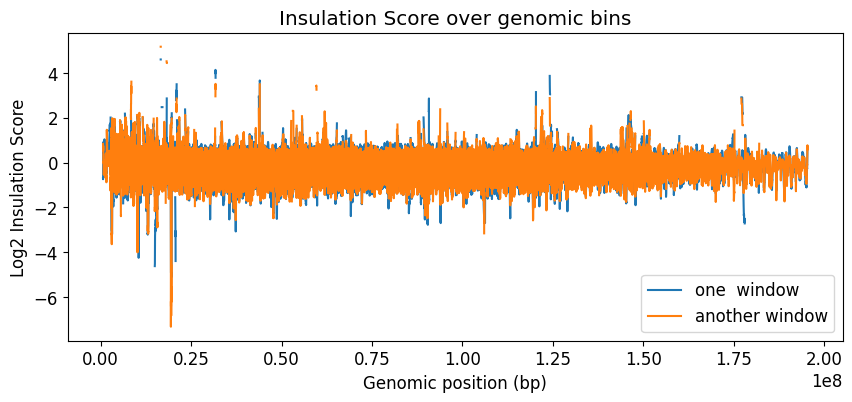

In [87]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(insulation_table['start'], insulation_table['log2_insulation_score_500000'], label='one  window')
ax.plot(insulation_table2['start'], insulation_table2['log2_insulation_score_250000'], label='another window')
ax.set_title('Insulation Score over genomic bins')
ax.set_xlabel('Genomic position (bp)')
ax.set_ylabel('Log2 Insulation Score')
ax.legend()
plt.show()

(120000000.0, 123000000.0)

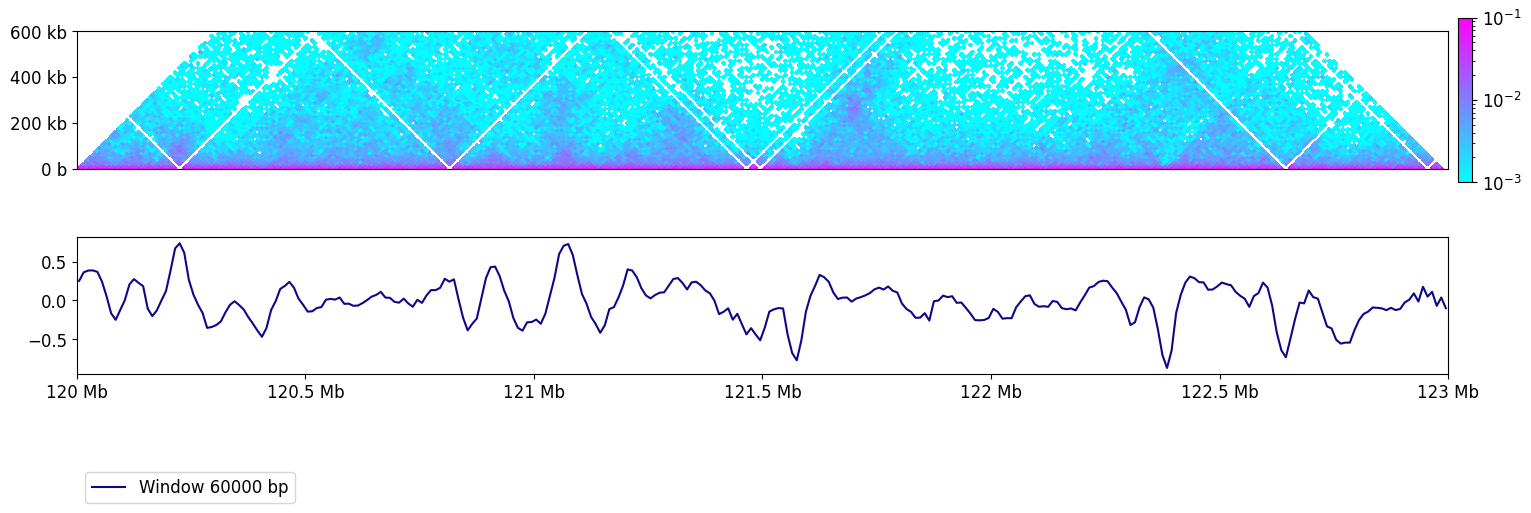

In [91]:

plt.rcParams['font.size'] = 12

start = 120000000
end = start+ 50*windows[0]
region = ('chr2', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr1.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='cool')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

In [95]:
boundaries = insulation_table.loc[insulation_table['is_boundary_500000']].copy()
boundaries['score'] = boundaries['boundary_strength_500000']
boundaries.to_csv(f'/content/TAD_boundaries_HiC1.bed', sep='\t', index=False, header=False, columns=['chrom', 'start', 'end', 'score'])

In [98]:
boundaries2 = insulation_table2.loc[insulation_table2['is_boundary_250000']].copy()
boundaries2['score'] = boundaries2['boundary_strength_250000']
boundaries2.to_csv(f'/content/TAD_boundaries_HiC2.bed', sep='\t', index=False, header=False, columns=['chrom', 'start', 'end', 'score'])

In [100]:
!head TAD_boundaries_HiC1.bed

chr1	3690000	3700000	0.31383129224796524
chr1	4770000	4780000	1.119666029041827
chr1	5190000	5200000	0.410614429292799
chr1	6210000	6220000	1.5643896367076917
chr1	7280000	7290000	1.1576171270939253
chr1	9530000	9540000	1.5834628576354897
chr1	10100000	10110000	0.5886775304220215
chr1	10810000	10820000	0.8680567881519533
chr1	11610000	11620000	1.218882151039279
chr1	12850000	12860000	1.1612899845139526


In [101]:
!head TAD_boundaries_HiC2.bed

chr1	3670000	3680000	0.651385749094413
chr1	4410000	4420000	0.5987314151649569
chr1	4780000	4790000	1.2679571140130568
chr1	5160000	5170000	0.5169422070502395
chr1	5870000	5880000	0.30825266830137843
chr1	6380000	6390000	1.4507606560883923
chr1	6870000	6880000	0.986151111352753
chr1	7220000	7230000	0.4613033566949905
chr1	8710000	8720000	0.2903540583249495
chr1	9540000	9550000	1.5748984894727585


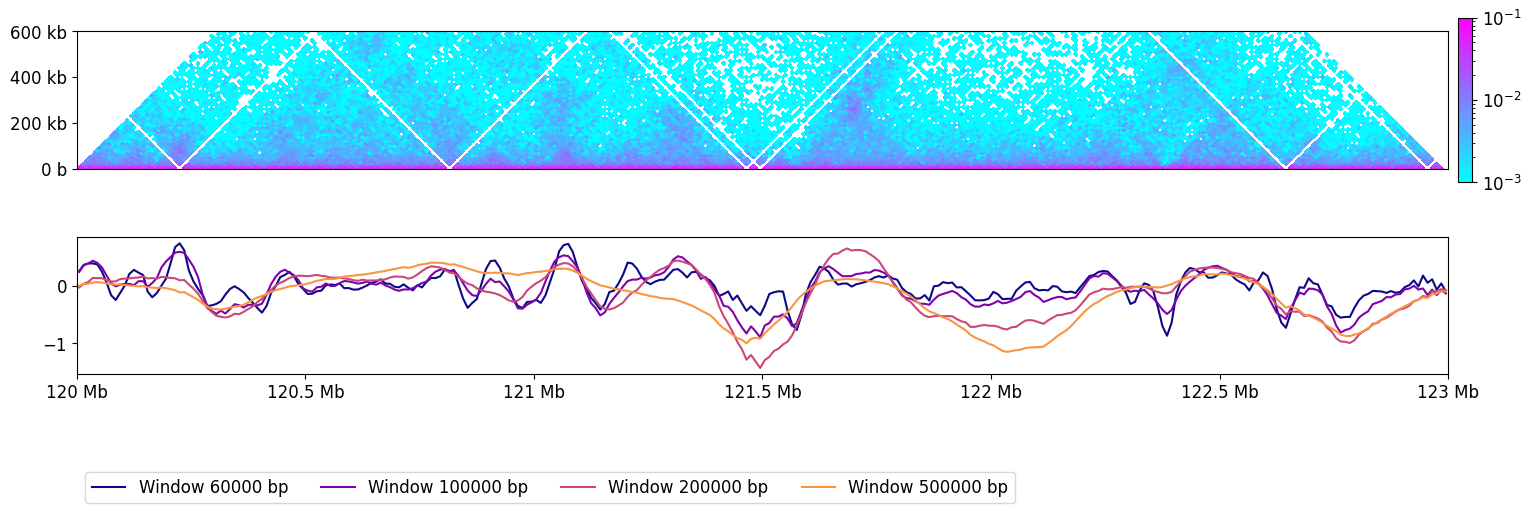

In [102]:
for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);
f

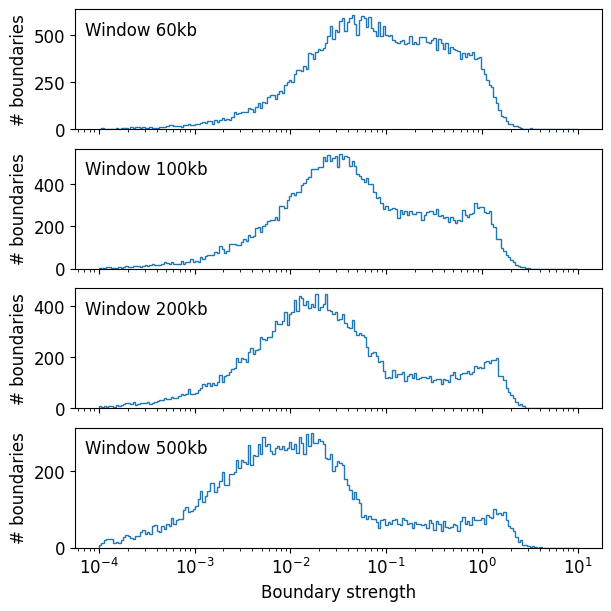

In [103]:
histkwargs = dict(
    bins=10**np.linspace(-4,1,200),
    histtype='step',
    lw=2,
)

f, axs = plt.subplots(len(windows),1, sharex=True, figsize=(6,6), constrained_layout=True)
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table[f'boundary_strength_{w}'],
        **histkwargs
    )
    ax.text(0.02, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength');

[Text(0.5, 0, 'Boundary strength')]

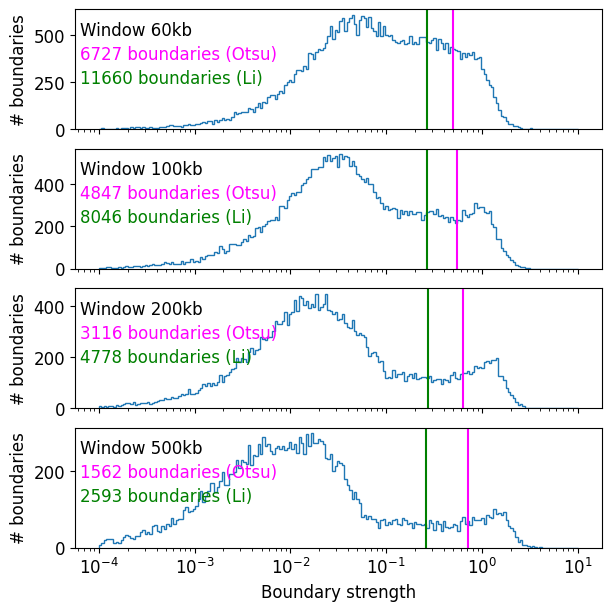

In [105]:
from skimage.filters import threshold_li, threshold_otsu

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

(120000000.0, 123000000.0)

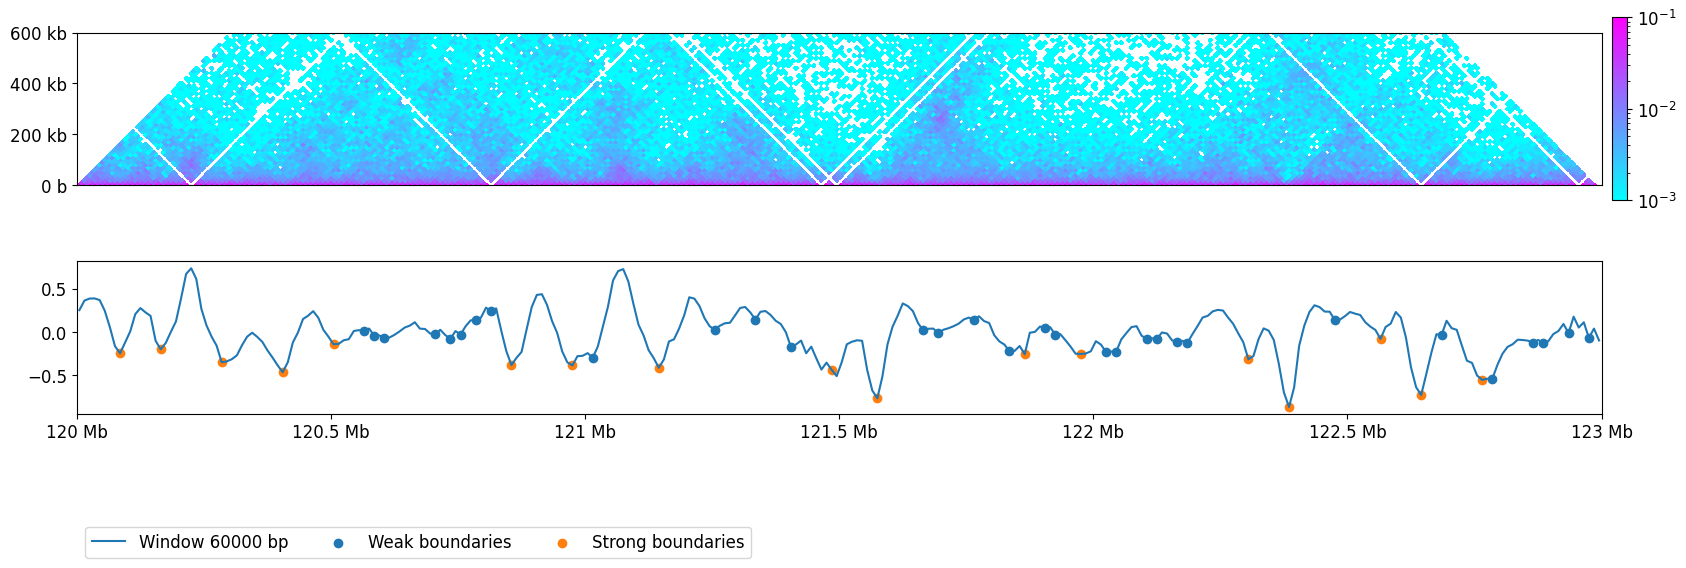

In [106]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='cool')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

Strong boundaries correspond to minimums on the graph

Useful links for TAD analysis and Hi-C data in general: https://github.com/mdozmorov/HiC_tools
